# Tugas Web Mining

Nama : Bihubbil Choir Aidifta<p>
NIM : 190411100121

# Instalasi Library
Pada tahap ini dilakukan instalasi library-library yang nantinya dibutuhkan untuk menjalankan program, berikut adalah library yang dibutuhkan : 

---



> ##  Snscrape
Snscrape merupakan perpustakaan / library sumber terbuka (open source) yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan scraping atau ekstraksi dari jejaring sosial. Pada program ini kita akan menggunakan Snscrape untuk mengambil/mengekstrak data Tweets dari Twitter.

> ## Pandas
Pandas merupakan perpustakaan / library sumber terbuka (Open Source) yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan analisis dan manipulasi data, khususnya untuk memanipulasi tabel numerik dan deret waktu.
Pada program ini kita akan memanfaatkan Pandas DataFrame untuk menempatkan data hasil crawling.

> ## Sastrawi
Sastrawi merupakan perpustakaan / library sumber terbuka yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan pengurangan kata-kata yang ter- infleksi dalam bahasa Indonesia ke bentuk baku-nya atau sesuai dengan standar kamus.

> ## Scikit-learn
Scikit-learn adalah library machine learning open source  untuk bahasa pemrograman Python. Ini fitur berbagai klasifikasi, regresi, algoritma pengelompokan, dan alat yang efisien untuk data mining dan analisis data. Ini dibangun di atas NumPy, SciPy, dan Matplotlib.


In [1]:
%%capture
!pip install snscrape
!pip install pandas
!pip install Sastrawi
!pip install scikit-learn

# Menulis Script Konfigurasi Snscrape
Pada tahap ini akan dibuat script kofigurasi scrapy, script ini sendiri berupa class yang berisi fungsi-fungsi untuk melakukan crawling dan scraping data abstrak yang berada pada website Portal Tugas Akhir Universitas Trunojoyo Madura.<p>
Berikut adalah penjelasan singkat mengenai script tersebut.

---
<br>

```
search_query = "Jokowi"
jumlah_tweets = 100
tweets = []
```

Variable tersebut merupakan variable yang berguna untuk mendefinisikan "search query" yang akan digunakan untuk mencari topik spesifik di twitter, "jumlah tweet" yang nantinya akan diambil, serta sebuah wadah berupa "list" yang nantinya akan digunakan untuk menyimpan data hasil scrape.

---

<br>

```
for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    
    if len(tweets) == jumlah_tweets:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content, 'None'])
```

Loop ini berfungsi untuk mengambil tiap data tweet yang berhasil diambil dari twitter berdasarkan query yang telah kita definisikan sebelumnya. Pada loop tersebut terdapat pengecekan kondisi yang akan mengecek jumlah tweet yang berhasil diambil, selama loop ini belum mencapai batas jumlah tweet yang kita tentukan sebelumnya, maka loop ini akan terus melakukan penambahan data tweet ke wadah(list) yang telah dibuat sebelumnya.


---

<br>

```
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'Label'])
```
Variable diatas berfungsi untuk mendefinisikan data tweet yang sebelumnya telah ditempatkan di wadah(list), dalam bentuk Pandas Dataframe.





In [2]:

import snscrape.modules.twitter as sntwitter
import pandas as pd

search_query = "Jokowi"
jumlah_tweets = 100
tweets = []


for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    
    if len(tweets) == jumlah_tweets:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content, 'None'])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'Label'])
print(df)


                        Date             User  \
0  2022-09-13 16:58:02+00:00       zafikakrom   
1  2022-09-13 16:57:52+00:00        dsangg377   
2  2022-09-13 16:57:39+00:00      koncektanah   
3  2022-09-13 16:57:29+00:00          itswylz   
4  2022-09-13 16:57:27+00:00   Syahrudin_Alam   
..                       ...              ...   
95 2022-09-13 16:32:53+00:00  DuniafintechCom   
96 2022-09-13 16:32:35+00:00   AnggitTiantoyo   
97 2022-09-13 16:32:25+00:00      AndiMardan_   
98 2022-09-13 16:32:13+00:00         VIVAcoid   
99 2022-09-13 16:32:04+00:00      tukangbatu_   

                                                Tweet Label  
0   @susipudjiastuti @jokowi @_TNIAL_ dah kubilang...  None  
1   @JudahLion88 @ProfOnline_id @jokowi Paham,\n\n...  None  
2        @yosnggarang @jokowi https://t.co/RRDA79xn8d  None  
3              Emot jokowi😭😭😭 https://t.co/kcgg6TcEGs  None  
4   Untuk mendukung ketahanan pangan NTT, ini maks...  None  
..                                     

## Melakukan Pengecekan Berkas Hasil Scrape Lama

Karena setelah melakukan scraping data tweet kita perlu memberikan label secara manual, maka untuk menghindari berkas lama tertimpa oleh berkas baru, disini kita akan melakukan pengecekan berkas hasil scrape lama, apakah ada pada direktori atau tidak. Jika berkas hasil scrape lama tidak ditemukan pada direktori, maka hasil scrape sebelumnya (yang ada pada Pandas Dataframe) akan diespor menjadi berkas csv.

In [3]:
%%capture
import os
!wget https://raw.githubusercontent.com/smilesense/datasets/master/ppw/19_121_tweets_labeled.csv -O 19_121_tweets_labeled.csv


output_stream = os.popen('cat 19_121_tweets_labeled.csv')
res = output_stream.read()
if res == '':
  df.to_csv('19_121_tweets_labeled.csv')

# Import Hasil
Setelah perintah sebelumnya berhasil dijalankan, selanjutnya kita akan melakukan import isi berkas hasil scrape sebelumnya kedalam Pandas DataFrame.

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None
# pd.options.display.max_colwidth = None
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
df = pd.read_csv('19_121_tweets_labeled.csv', usecols=['User', 'Tweet', 'Label'])
df

,User,Tweet,Label
0,Truncvg,@jokowi Mentolo napuk cocot.e samean aku pak\r...,Negatif
1,WartaEkonomi,Achmad Nur Hidayat Ungkap Kemungkinan Kaitan P...,Negatif
2,okezonenews,Bjorka: Apa Anda (Jokowi) butuh bantuan saya u...,Negatif
3,infoBanyumas12,#Foto Presiden Jokowi mengakui kenaikan harga ...,Positif
4,Metdro2,@Yatie84991237 @_TNIAL_ @edhi_shi @JohnVirgoVj...,Negatif
...,...,...,...
76,bn_1c,President Jokowi is Committed to Resolving Hum...,Positif
77,adi27setiawan,"@jokowi Telek pak2, kekayaan indo hanya dinikm...",Negatif
78,AyahFerGie,@yosnggarang @jokowi Tiada hari tanpa omong ko...,Negatif
79,de_fatah,@JSuryoP1 Kasihan Pak Prabowo juga. Sudah rela...,Negatif


# Preprocessing Data Tweets

## Case Folding
Case folding merupakan tahap text preprocessing yang berguna untuk :


*   Mengubah huruf kapital menjadi huruf kecil
*   Mengapus tanda baca
*   Menghapus angka
*   Menghapus karakter kosong

<br>

Sebelum melakukan case folding diatas, kode ini juga melakukan penghapusan link dan mention yang ada pada data tweet.



In [5]:
import string

#Mengapus link dan mention
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)
indx = 0
for i in df['Tweet']:
  temp = df['Tweet'][indx].split()
  for j in temp:
    if 'http' in j:
      df['Tweet'] = df['Tweet'].replace(r'%s'%j," ", regex=True)
    if '@' in j:
      df['Tweet'] = df['Tweet'].replace(r'%s'%j," ", regex=True)
  indx+=1



#mengubah menjadi huruf kecil
df['Tweet'] = df['Tweet'].str.lower()

#menghapus tanda baca
for char in string.punctuation:
    df['Tweet'] = df['Tweet'].replace(r'[\%s]'%char," ", regex=True)

#menghapus angka
df['Tweet'] = df['Tweet'].replace(r'\d+',' ', regex=True)

#menghapus karakter kosong
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)
df['Tweet'][2]



'bjorka apa anda jokowi butuh bantuan saya untuk menyelesaikan masalah ini pak '

## Stopwords Removal
StopWords Removal merupakan tahap prepocessing yang berguna untuk menhapus kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll.


In [6]:
import urllib.request, json 
with urllib.request.urlopen("https://raw.githubusercontent.com/smilesense/stopwords-id/master/stopwords-id.json") as list_stopwords:
    data_stopword = json.load(list_stopwords)

for i in data_stopword:
    df['Tweet'] = df['Tweet'].replace(r'\b%s\b'%i, '', regex=True)
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)

df['Tweet'][2]

'bjorka jokowi butuh bantuan menyelesaikan '

## Stemming
Stemming merupakan tahapan dalam preprocessing yang berguna untuk mengubah kata yang memiliki imbuhan menjadi kata dasarnya. Contohnya adalah, misal pada suatu teks terdapat kata "berjalan", maka dengan menerapkan metode stemming, teks tersebut akan diubah menjadi kata "jalan" atau bentuk dasar dari kata "berjalan". 

In [7]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# stemming process

ind = 0
for sentence in df['Tweet']:
    df['Tweet'][ind] = stemmer.stem(str(sentence))
    ind+=1
df

,User,Tweet,Label
0,Truncvg,mentolo napuk cocot e samean ga nduwe cermin t...,Negatif
1,WartaEkonomi,achmad nur hidayat kait lengser suharso monoar...,Negatif
2,okezonenews,bjorka jokowi butuh bantu selesai,Negatif
3,infoBanyumas12,foto presiden jokowi aku naik harga bbm pengar...,Positif
4,Metdro2,iya dluhuran,Negatif
...,...,...,...
76,bn_1c,president jokowi is committed to resolving hum...,Positif
77,adi27setiawan,telek kaya indo nikmat gelintir orang yg uang ...,Negatif
78,AyahFerGie,tiada omong kosong citra,Negatif
79,de_fatah,kasihan prabowo rela bantu elu elu puji muji j...,Negatif


## Tokenisasi

Tokenizing adalah tahap preprocessing yang berguna untuk memisahkan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token.

In [8]:
indeks = 0
df2 = df.copy()
for tweet in df2['Tweet']:
    df2['Tweet'][indeks] = str(tweet).split()
    indeks+=1

df2['Tweet'][2]


['bjorka', 'jokowi', 'butuh', 'bantu', 'selesai']

## Hasil Preprocessing


In [9]:
df2.to_csv(r'hasil_preprocessing.csv', index=False)
df2

,User,Tweet,Label
0,Truncvg,"[mentolo, napuk, cocot, e, samean, ga, nduwe, ...",Negatif
1,WartaEkonomi,"[achmad, nur, hidayat, kait, lengser, suharso,...",Negatif
2,okezonenews,"[bjorka, jokowi, butuh, bantu, selesai]",Negatif
3,infoBanyumas12,"[foto, presiden, jokowi, aku, naik, harga, bbm...",Positif
4,Metdro2,"[iya, dluhuran]",Negatif
...,...,...,...
76,bn_1c,"[president, jokowi, is, committed, to, resolvi...",Positif
77,adi27setiawan,"[telek, kaya, indo, nikmat, gelintir, orang, y...",Negatif
78,AyahFerGie,"[tiada, omong, kosong, citra]",Negatif
79,de_fatah,"[kasihan, prabowo, rela, bantu, elu, elu, puji...",Negatif


# Term Frequency (TF)
Term Frequency merupakan metode yang digunakan untuk mengetahui seberapa sering suatu kata muncul dalam suatu teks. Semakin banyak frekuensi kemunculan dari kata tsb, semakin besar pula nanti nilainya.



## Term Frequency Keseluruhan

In [10]:
listkata = []
for tweet in df['Tweet']:
    listkata = listkata + str(tweet).split()

listkata_nodup = list(dict.fromkeys(listkata))
hasil_hitung = {}
for test1 in listkata_nodup:
    jumlah = 0
    for test2 in range(len(listkata)):
        if test1 == listkata[test2]:
            jumlah+=1
    hasil_hitung.update({'%s'%test1 : jumlah})
    
hasil_hitung = dict(sorted(hasil_hitung.items(), key=lambda item: item[1], reverse=True))
print(hasil_hitung)

{'jokowi': 37, 'yg': 27, 'presiden': 12, 'gak': 10, 'ga': 9, 'bangun': 9, 'bbm': 9, 'aja': 9, 'nya': 6, 'demo': 6, 'rakyat': 6, 'bjorka': 5, 'naik': 5, 'perintah': 5, 'orang': 5, 'subsidi': 5, 'tau': 5, 'negeri': 5, 'anies': 5, 'kaya': 5, 'bantu': 4, 'kerja': 4, 'jawa': 4, 'to': 4, 'negara': 4, 'ya': 4, 'data': 4, 'amp': 4, 'periode': 4, 'tambal': 4, 'harga': 3, 'biar': 3, 'hoax': 3, 'janji': 3, 'surplus': 3, 'apbn': 3, 'blt': 3, 'nama': 3, 'bendung': 3, 'of': 3, 'indonesia': 3, 'penuh': 3, 'dasar': 3, 'tuh': 3, 'kompeten': 3, 'demokrat': 3, 'ganti': 3, 'ekonomi': 3, 'pasang': 3, 'tuju': 3, 'percaya': 3, 'jabat': 3, 'dosa': 3, 'jis': 3, 'e': 2, 'samean': 2, 'foto': 2, 'pengaruh': 2, 'laju': 2, 'inflasi': 2, 'berita': 2, 'lanjut': 2, 'anak': 2, 'klo': 2, 'uang': 2, 'bagus': 2, 'aceh': 2, 'beli': 2, 'deh': 2, 'raja': 2, 'ngibul': 2, 'klemer': 2, 'jakarta': 2, 'ambassador': 2, 'president': 2, 'in': 2, 's': 2, 'suara': 2, 'adlh': 2, 'tuhan': 2, 'mundur': 2, 'usaha': 2, 'rintis': 2, 'bin': 

## Term Frequency Tiap Tweet

In [11]:
def terms(dataframe):
  # pd.options.mode.chained_assignment = None
  # pd.options.display.max_colwidth = None
  # pd.options.display.max_columns = None
  # pd.options.display.max_rows = None

  df3 = dataframe.copy()
  a = 1
  for inter in range(len(df3['Tweet'])):
      for fitur in hasil_hitung:
          df3['%s'%(fitur)] = 0
          a+=1

  for inter in range(len(df3['Tweet'])):
    for fitur in hasil_hitung:
        cek = df3['Tweet'][inter]
        jumlah = 0
        for iter2 in range(len(cek)):
          if fitur == cek[iter2]:
            jumlah+=1
        df3['%s'%(fitur)][inter] = jumlah
        a+=1
  df3.to_csv(r'my_data.csv', index=False)
  return df3
  

terms(df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()


,User,Tweet,Label,jokowi,yg,presiden,gak,ga,bangun,bbm,...,citra,kasihan,prabowo,rela,puji,muji,jilat,pssi,pantes,suram
0,Truncvg,"[mentolo, napuk, cocot, e, samean, ga, nduwe, ...",Negatif,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,WartaEkonomi,"[achmad, nur, hidayat, kait, lengser, suharso,...",Negatif,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,okezonenews,"[bjorka, jokowi, butuh, bantu, selesai]",Negatif,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,infoBanyumas12,"[foto, presiden, jokowi, aku, naik, harga, bbm...",Positif,2,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Metdro2,"[iya, dluhuran]",Negatif,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,bn_1c,"[president, jokowi, is, committed, to, resolvi...",Positif,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,adi27setiawan,"[telek, kaya, indo, nikmat, gelintir, orang, y...",Negatif,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,AyahFerGie,"[tiada, omong, kosong, citra]",Negatif,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
79,de_fatah,"[kasihan, prabowo, rela, bantu, elu, elu, puji...",Negatif,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,0,0,0


# Seleksi Fitur Menggunakan Information Gain (Mutual Information)

Information Gain Merupakan metode yang digunakan untuk mengukur seberapa penting / berpengaruh sebuah fitur terhadap hasil pengukuran. Penggunaan teknik ini dapat mereduksi dimensi fitur dengan cara mengukur reduksi Entropy sebelum dan sesudah pemisahan. Metode ini juga dikenal dengan sebutan Mutual Information, biasanya digunakan untuk mengetahui dependency antara dua variable "x" dan "y".


## Melakukan Training 
Training disini berfungsi untuk menghindari overfitting, yaitu keadaan dimana suatu model berusaha untuk mempelajari seluruh detail dalam data.

In [12]:
df4 = pd.read_csv('my_data.csv')
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df4.drop(labels=['Label', 'User', 'Tweet'], axis=1),
    df4['Label'],
    test_size=0.3,
    random_state=0)
X_train

,jokowi,yg,presiden,gak,ga,bangun,bbm,aja,nya,demo,...,citra,kasihan,prabowo,rela,puji,muji,jilat,pssi,pantes,suram
43,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
63,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,1,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Melakukan seleksi Fitur
Setelah melakukan training untuk menghindari overfitting, selanjutnya data hasil training tersebut akan dilakukan feature selection menggunakan metode mutual information classification

In [13]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([2.21195196e-01, 0.00000000e+00, 0.00000000e+00, 3.82032362e-02,
       0.00000000e+00, 2.44158113e-02, 0.00000000e+00, 0.00000000e+00,
       3.90802064e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.16218382e-02, 4.22093431e-04,
       6.01932661e-02, 7.54161748e-03, 4.46456173e-02, 0.00000000e+00,
       8.87228473e-02, 2.50913820e-02, 2.41466513e-02, 0.00000000e+00,
       2.97613922e-02, 0.00000000e+00, 9.32581377e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.67213406e-02,
       0.00000000e+00, 8.90200505e-02, 2.42386036e-02, 0.00000000e+00,
       3.77201105e-02, 0.00000000e+00, 0.00000000e+00, 9.75722431e-03,
       4.35955802e-02, 0.00000000e+00, 8.86890253e-02, 0.00000000e+00,
       0.00000000e+00, 2.83772425e-02, 5.06853602e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.82153935e-02, 1.47664274e-02, 6.65302686e-03, 0.00000000e+00,
      

## Melakukan Ranking Fitur
Setelah selesai melakukan seleksi fitur, pada tahap ini kita akan meranking fitur tersebut berdasarkan tingkatan information gain (mutual information) yang dimiliki.

In [14]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

jokowi             0.221195
karyawan           0.181296
salah              0.169230
violations         0.149552
i                  0.148153
                     ...   
nanya              0.000000
assalamualaikum    0.000000
sen                0.000000
yoh                0.000000
suram              0.000000
Length: 603, dtype: float64

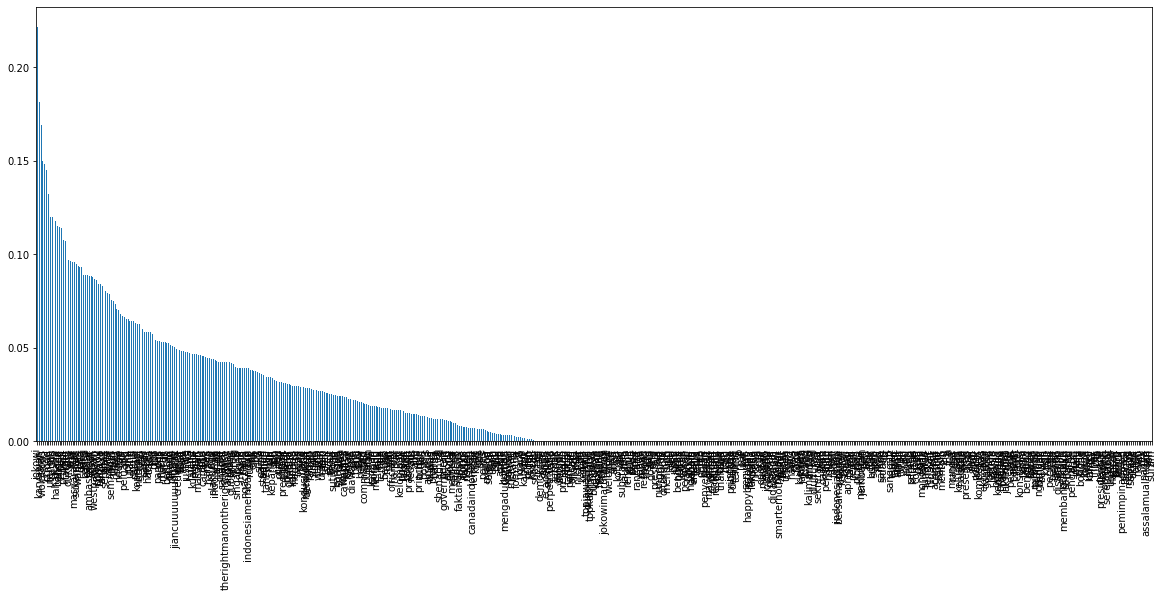

In [15]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [16]:
from sklearn.feature_selection import SelectKBest

sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['kerja', 'usaha', 'jangn', 'kepanjen', 'dng'], dtype='object')